In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
import sys
import os

IS_COLAB = "google.colab" in sys.modules

if IS_COLAB:
  from google.colab import drive
  drive.mount('/content/drive/', force_remount=True)
  # Adapt the folder to your specific one
  project_path = '/content/drive/MyDrive/DAML_project'
  print(os.getcwd())
  os.chdir(project_path) # Use os.chdir to change directory
  print(project_path)
  current_directory = os.getcwd()  # Get the current working directory using os.getcwd()
  print(f"Current working directory: {current_directory}")

elif not IS_COLAB:
  pass

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Mounted at /content/drive/
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-b5805181c271>", line 11, in <cell line: 0>
    print(os.getcwd())
          ^^^^^^^^^^^
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number

In [ ]:
#data = pd.read_csv("Data/Cancer_patient_data_sets.csv")
project_path_Data = '/content/drive/MyDrive/DAML_project/Data'

os.chdir(project_path_Data) # Use os.chdir to change directory
contents = os.listdir(project_path_Data)
print(os.getcwd())
for item in contents:
    print(item)

data = pd.read_csv('Cancer_patient_data_sets.csv')

/content/drive/.shortcut-targets-by-id/1XRSLRCFWycCtCov4FOXBOpgG6rTMfnXu/DAML_project/Data
archive.zip
Cancer_patient_data_sets.csv


In [ ]:
print("Features (colonne) del dataset:")
print(data.columns.tolist())

Features (colonne) del dataset:
['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring', 'Level']


In [ ]:
print(data.head())
print(data.columns)
print(data.isnull().sum()) # per vedere se ci sono valori mancanti

   Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0   33       1              2            4             5   
1   17       1              3            1             5   
2   35       1              4            5             6   
3   37       1              7            7             7   
4   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   Obesity  ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0        4  ...        3            4                    2         2   
1        2  ...        1  

In [ ]:
X = data.drop("Level", axis=1)  # tutte le feature
y = data["Level"].to_numpy().reshape(-1,1)               # target: livello cancro

In [ ]:
# Applica Label Encoding su ogni colonna delle features
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Codifica anche il target
enc = OneHotEncoder(sparse_output=False)
y = enc.fit_transform(y)
print(y)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
# Normalizza i dat
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Divisione del dataset in training + test set, validation test
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
# Divisione di training + test in due set separati
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Rete molto easy del cavolo
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(32, input_dim=X.shape[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l1(1e-7), kernel_initializer='glorot_uniform'))
model.add(Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(1e-7), kernel_initializer='glorot_uniform'))
model.add(Dense(3, activation='softmax'))  # per classificazione ternaria

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# TRaining modello con Adam perchè bello
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=1, validation_split=0.2)

Epoch 1/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8292 - loss: 0.5149 - val_accuracy: 0.9944 - val_loss: 0.0452
Epoch 2/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9964 - loss: 0.0308 - val_accuracy: 1.0000 - val_loss: 0.0066
Epoch 3/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 4/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 5/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 5.5355e-04
Epoch 6/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 4.9553e-04 - val_accuracy: 1.0000 - val_loss: 3.3489e-04
Epoch 7/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 3.0279e-04 - val_accuracy: 1.0000 - val_loss: 2.0242e-04
Epoch 8/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 1.0000 - loss: 1.940

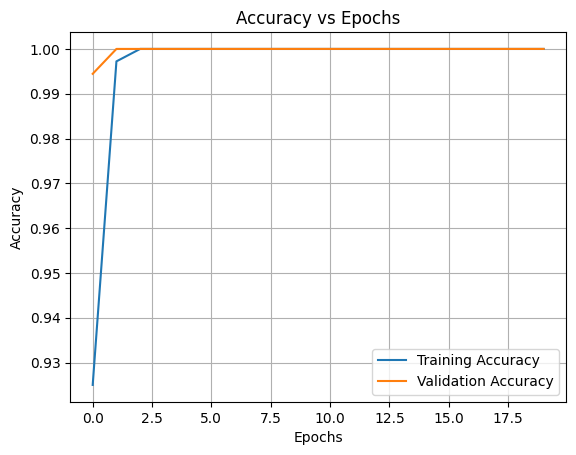

In [ ]:
# Grafichino accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 3.3358e-05
Test Accuracy: 1.00


**Volendo potremmo provare ad utilizzare XGBoost, random forest e logistic regression e poi confrontare le performance tra i vari modelli (con cross validation/precision/recall/F1-score/confusion matrix).**

**FEATURE SELECTION** con random forrest gump

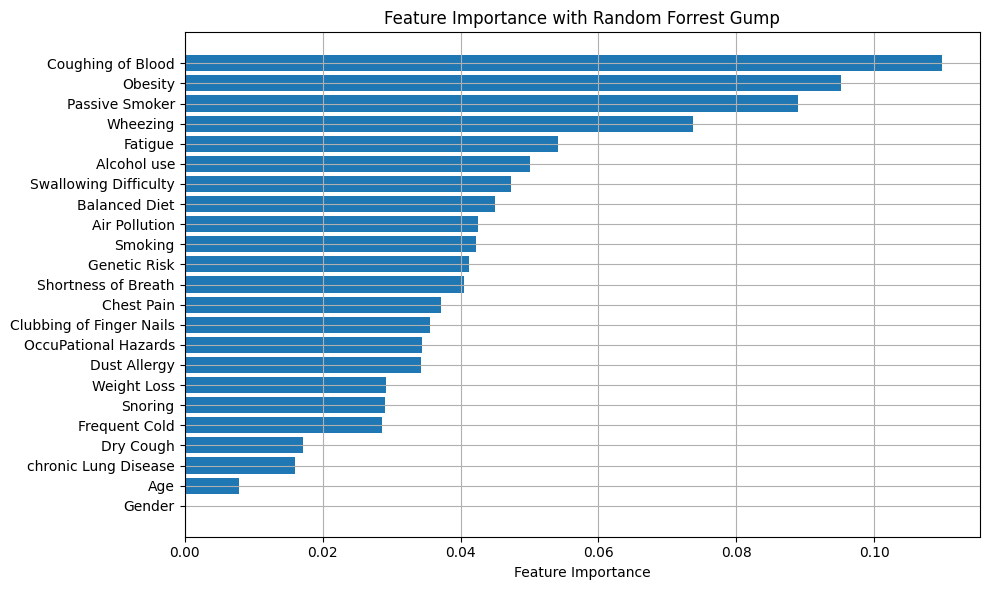

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Modello Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

X = data.drop("Level", axis=1)  # ⬅️ niente .values
y = (data["Level"] == "High").astype(int)  # esempio di target binario

# Identificazione features più importanti
importances = rf.feature_importances_
feature_names = X.columns  # se X è un DataFrame

# Crea un DataFrame
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Grafichino-ino-ino per capirci meglio
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()
plt.title("Feature Importance with Random Forrest Gump")
plt.grid(True)
plt.tight_layout()
plt.show()